# Wstęp do programowania
## Lista 6

Uzupełnij swoje dane poniżej, następnie przeczytaj treść zadań i umieść rozwiązania w odpowidenich komórkach pozostawionych w tym celu pod treścią. Pamiętaj dbać o specyfikację, czyli nazwy zmiennych oraz odpowiednie rozmieszczenie komórek. Jeśli uruchomisz wszystkie komórki, dokument powinien działać bez błędów.

  * **Imię:** ...
  * **Nazwisko:** ...
  * **Numer indeksu:** ...

W rozwiązaniach zadań możesz korzystać z wielu bibliotek. Do obliczeń `math`, `numpy` oraz `sympy`. Do wizualizacji `matplotlib.pyplot` oraz `ipywidgets`. Testy możesz wykonywać za pomocą modułów `unittest` oraz `doctest`.

In [1]:
import math
import unittest
import doctest
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from ipywidgets import interact
from hypothesis import given, strategies as st

### Zadanie 1

Przypomnij sobie zadanie o spirali archimedejskiej (zadanie 2 z listy 5).

Spróbuj stworzyć interaktywny interfejs do wizualizacji tego, jak wybrane parametry wpływają na kształt spirali.

Rozwiązanie umieść w komórce poniżej.

interactive(children=(FloatSlider(value=0.15, description='r', max=1.0, step=0.05), FloatSlider(value=8.0, des…

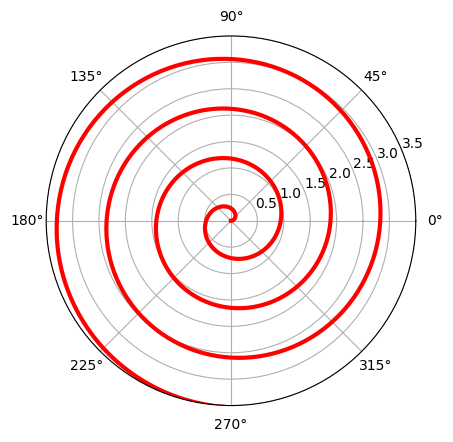

In [5]:
@interact(r=(0,1, 0.05), pi=(2, 10, 0.5))
def rysuj(r=0.15, pi=8):
    theta = np.linspace(0., pi*np.pi, 1000)
    wykres = plt.subplot(111, projection='polar')
    wykres.plot(theta, r*theta, color='r', linewidth=3)
    wykres.set_rmax(3.5)
rysuj()

### Zadanie 2

Zaprojektuj testy jednostkowe sprawdzające, że funkcja `max` z Pythona działa dobrze dla list liczb całkowitych i zmiennoprzecinkowych bez `NaN`. Napisz przynajmniej 3 testy za pomocą modułu `unittest`. Kod testów umieść w komórce poniżej.

In [3]:
@unittest.FunctionTestCase
def test_dla_calkowitych():
    assert max([1, 2, 3]) == 3, "max() zwraca zły wynik dla listy całkowitych"

@unittest.FunctionTestCase
def test_dla_zmiennoprzecinkowych():
    assert max([1.1, 2.2, 3.3]) == 3.3, "max() zwraca zły wynik dla listy zmiennoprzecinkowych"

@unittest.FunctionTestCase
def test_dla_mieszanych():
    assert max([1, 2, 3.3, 4]) == 4, "max() zwraca zły wynik dla listy zmieszanej z całkowitych i zmiennoprzecinkowych"


Uruchomienie testów umieść w komórce poniżej.

In [4]:
suite = unittest.TestSuite()
suite.addTest(test_dla_calkowitych)
suite.addTest(test_dla_zmiennoprzecinkowych)
suite.addTest(test_dla_mieszanych)
assert unittest.TextTestRunner().run(suite)

...
----------------------------------------------------------------------
Ran 3 tests in 0.002s

OK


### Zadanie 3

Przypomnij sobie zadanie o funkcjach do liczenia liczby dni pomiędzy datami (zadanie 1 lista 4). Rozbuduj funkcje `ile_dni` oraz `dzień_juliański` tak, aby zgłaszały odpowiednie wyjątki, gdy użytkownik ich źle użyje.

Kod umieść w komórce poniżej.

In [27]:
from collections.abc import Iterable

def dzien_julianski(D, M, R):
    if type(D) is not int or type(M) is not int or type(R) is not R:
        raise TypeError("Dni, miesiace i lata oczekuje jako liczby calkowite")
    if D < 0 or M < 0 or R < 0:
        raise ValueError("Oczekuje liczb nieujemnych")

    return D+(153*M+2)//5+365*R+R//4-R//100+R//400-32045

def ile_dni(data1, data2):
    if not isinstance(data1, Iterable) or not isinstance(data2, Iterable):
        raise TypeError("Oczekuje obiektów przez które mogę iterować")
    for element in data1:
        if type(element) is not int:
            raise TypeError("Data 1. oczekuje liczb calkowitych")
        if element < 1:
            raise ValueError("Data 1. oczekuje liczb dodatnich")
    for element in data2:
        if type(element) is not int:
            raise TypeError("Data 2. oczekuje liczb calkowitych")
        if element < 1:
            raise ValueError("Data 2. oczekuje liczb dodatnich")

    return abs(dzien_julianski(data1[0], data1[1], data1[2]) - dzien_julianski(data2[0], data2[1], data2[2]))

# to do test czy poprawna liczba dni i miesiecy (rok przestepny)

ile_dni((2, 2, 2001), (-2, 3, 2002))

ValueError: Data 2. oczekuje liczb dodatnich

### Zadanie 4

Przypomnij sobie funkcję do wyliczania objętości hiperkuli (zadanie 5 lista 4). Dodaj do niej dokumentację opisującą użycie funkcji oraz przykładowe testy, które sprawdzisz modułem `doctest`.

Rozwiązanie umieść w komórce poniżej.

In [19]:
def hiperkula(r, n):
    """Funkcja obliczająca objętość hiperkuli
    
    Dla dowolnych r,n takich, że r,n > 0 i r,n należą do naturalnych funkcja zwraca objetosc n-wymiarowej hiperkuli o promieniu r

    >>> hiperkula(1, 1)
    1.9999999999999998

    >>> hiperkula(0, 0)
    'Wartość mniejsza od 1'

    >>> hiperkula(1.1, 2)
    'Zły typ danych'

    """
    if type(r) is not int or type(n) is not int:
        return "Zły typ danych"
    if r < 1 or n < 1:
        return "Wartość mniejsza od 1"

    return (math.pi**(n/2))/(math.gamma((n/2)+1))*(r**n)

Uruchom opracowane testy, aby sprawdzić, czy dobrze działają.

In [20]:
doctest.testmod()

TestResults(failed=0, attempted=3)

### Zadanie 5

Wybierz dowolne zadanie z kursu Analiza matematyczna, spróbuj je rozwiązać za pomocą biblioteki SymPy.

Treść zadania umieść w komórce tekstowej poniżej, zadbaj o formatowanie tekstu oraz wzorów.

Oblicz:

$\lim_{n \to +\infty}\frac{n^3+2n^2+1}{n-4n^3}$

Rozwiązanie wybranego zadania umieść w komórce poniżej.

In [28]:
n = sp.symbols('n')
expr = (n**3 + 2*(n**2)+ 1)/(n-4*(n**3))

limit_expr = sp.limit(expr, n, sp.oo)
limit_expr

-1/4

<div style="text-align: right"> Powodzenia!<br><i>Zespół kursu Wstęp do programowania</i></div>